<a href="https://colab.research.google.com/github/effaaykhan/Reports/blob/main/Phishing_Detection_System_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_bal - 20000.xlsx to data_bal - 20000.xlsx


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.8534 - loss: 0.3703 - val_accuracy: 0.9406 - val_loss: 0.1773
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9426 - loss: 0.1858 - val_accuracy: 0.9497 - val_loss: 0.1526
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.9559 - loss: 0.1444 - val_accuracy: 0.9572 - val_loss: 0.1321
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9613 - loss: 0.1222 - val_accuracy: 0.9603 - val_loss: 0.1211
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.9635 - loss: 0.1067 - val_accuracy: 0.9619 - val_loss: 0.1130
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9724 - loss: 0.0880 - val_accuracy: 0.9594 - val_loss: 0.1296
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.9782 - loss: 0.0689 - val_accuracy: 0.9672 - val_loss: 0.1059
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9841 - loss: 0.0504 - val_accu

Accuracy: 96.80%
F1-Score: 0.9680%
Precision: 0.9683%
Recall: 0.9680%
True Positives (TP): 1956
True Negatives (TN): 1916
False Positives (FP): 88
False Negatives (FN): 40
Optimal Threshold: 0.7291
Model saved!


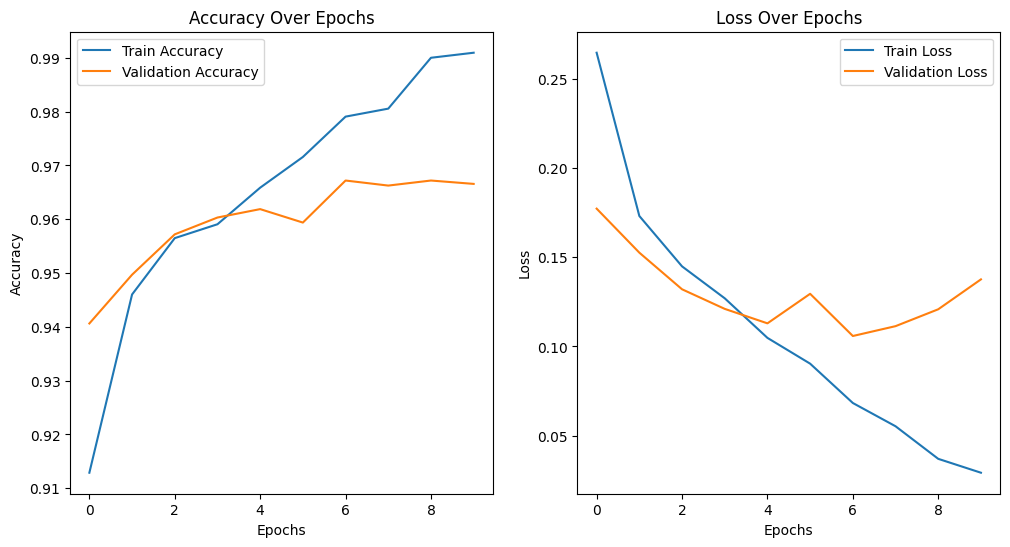

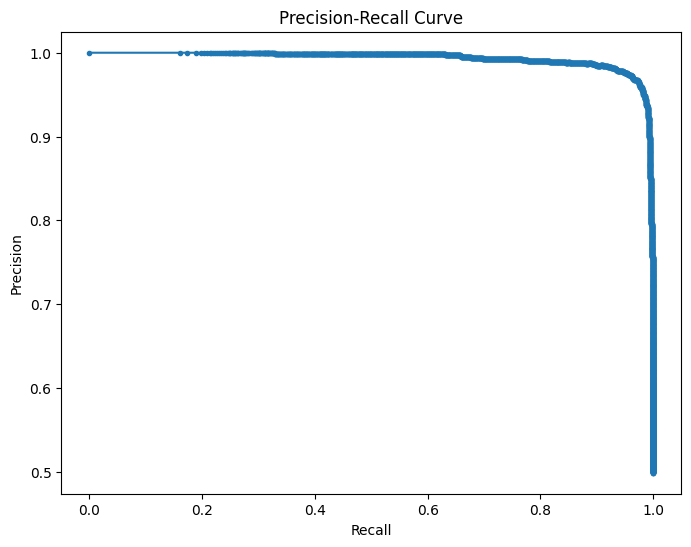

In [3]:
# Google Colab: Directory Setup
import os

# Create directories for data and models
os.makedirs("data", exist_ok=True)
os.makedirs("models", exist_ok=True)

# print("Directories created. Please upload your dataset to the 'data' directory.")

# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load Dataset
data_path = "/content/data_bal - 20000.xlsx"  # Update with your uploaded file path in Colab
df = pd.read_excel(data_path)

# Preprocess Dataset
# Convert labels to integers
df['Labels'] = df['Labels'].astype(int)

# Tokenize URLs (Character-level tokenization)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize character sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['URLs'])

# Convert URLs to sequences
sequences = tokenizer.texts_to_sequences(df['URLs'])

# Pad sequences to the same length
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Labels
y = df['Labels'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Implementation: Character-level CNN
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64  # Increased batch size for faster convergence
epochs = 10  # Increased epochs for better training

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

# Accuracy
accuracy = np.mean(y_pred.flatten() == y_test.flatten()) * 100

# Confusion Matrix Components
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate F1-score, precision, and recall
f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']

print(f"Accuracy: {accuracy:.2f}%")
print(f"F1-Score: {f1_score:.4f}%")
print(f"Precision: {precision:.4f}%")
print(f"Recall: {recall:.4f}%")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Threshold Tuning
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_probs)
optimal_idx = np.argmax(precision_vals * recall_vals)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Save the model
model.save("models/phishing_cnn_model.h5")
print("Model saved!")

# Plot Training and Validation Metrics
def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

# Plot Precision-Recall Curve
def plot_precision_recall(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

plot_precision_recall(precision_vals, recall_vals)



In [4]:
tokenizer_json = tokenizer.to_json()
with open('models/tokenizer.json', 'w') as f:
    f.write(tokenizer_json)
